In [1]:
# orbit - Program to compute the orbit of a comet.

# Set up configuration options and special features
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from nm4p.rk4 import rk4
from nm4p.rka import rka

In [5]:
#* Define the gravrk function used by the Runge-Kutta routines
def gravrk(s,t,GM):
    """Returns right-hand side of Kepler ODE; used by Runge-Kutta routines
       Inputs
         s      State vector [r(1) r(2) v(1) v(2)]
         t      Time (not used)
         GM     Parameter G*M (gravitational const. * solar mass)
       Output
         deriv  Derivatives [dr(1)/dt dr(2)/dt dv(1)/dt dv(2)/dt]
    """
    
    #* Compute acceleration
    r = np.array([s[0], s[1]])  # Unravel the vector s into position and velocity
    v = np.array([s[2], s[3]])
    accel = -GM*r/np.linalg.norm(r)**3    # Gravitational acceleration

    #* Return derivatives [dr(1)/dt dr(2)/dt dv(1)/dt dv(2)/dt]
    deriv = np.array([v[0], v[1], accel[0], accel[1]])
    return deriv

In [10]:
#* Set initial position and velocity of the comet.
r0 = input('Enter initial radial distance (AU): ')  
v0 = input('Enter initial tangential velocity (AU/yr): ')
r = np.array([float(r0), 0])
v = np.array([0, float(v0)])
state = np.array([ r[0], r[1], v[0], v[1] ])   # Used by R-K routines

#* Set physical parameters (mass, G*M)
GM = 4 * np.pi**2      # Grav. const. * Mass of Sun (au^3/yr^2)
mass = 1.0             # Mass of comet 
adaptErr = 1.0e-3      # Error parameter used by adaptive Runge-Kutta
time = 0.0

In [11]:
print(state)

[5. 0. 0. 1.]


In [12]:
#* Loop over desired number of steps using specified
#  numerical method.
nStep = input('Enter number of steps: ')
nStep = int(nStep)
tau = input('Enter time step (yr): ')
tau = float(tau)
NumericalMethod = int(input(
    'Choose a numerical method: 1) Euler; 2) Euler-Cromer; 3) Runge-Kutta; 4) Adaptive R-K'))
rplot = np.empty(nStep)           
thplot = np.empty(nStep)
tplot = np.empty(nStep)
kinetic = np.empty(nStep)
potential = np.empty(nStep)

for iStep in range(nStep):  

    #* Record position and energy for plotting.
    rplot[iStep] = np.linalg.norm(r)                # Record position for polar plot
    thplot[iStep] = np.arctan2(r[1],r[0])
    tplot[iStep] = time
    kinetic[iStep] = .5*mass*np.linalg.norm(v)**2   # Record energies
    potential[iStep] = - GM*mass/np.linalg.norm(r)
  
    #* Calculate new position and velocity using desired method.
    if NumericalMethod == 1 :
        accel = -GM*r/np.linalg.norm(r)**3   
        r = r + tau*v              # Euler step
        v = v + tau*accel  
        time = time + tau    
    elif NumericalMethod == 2 :
        accel = -GM*r/np.linalg.norm(r)**3   
        v = v + tau*accel 
        r = r + tau*v              # Euler-Cromer step
        time = time + tau     
    elif NumericalMethod == 3 :
        state = rk4(state,time,tau,gravrk,GM)
        r = np.array([state[0], state[1]])   # 4th order Runge-Kutta
        v = np.array([state[2], state[3]])
        time = time + tau   
    else : 
        [state, time, tau] = rka(state,time,tau,adaptErr,gravrk,GM)
        r = np.array([state[0], state[1]])    # Adaptive Runge-Kutta
        v = np.array([state[2], state[3]])

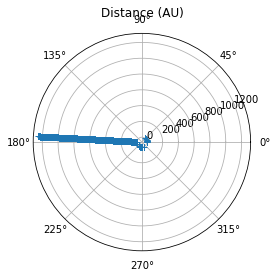

In [13]:
#* Graph the trajectory of the comet.
ax = plt.subplot(111, projection='polar')  # Use polar plot for graphing orbit
ax.plot(thplot,rplot,'+')  
ax.set_title('Distance (AU)')  
ax.grid(True)
plt.show()

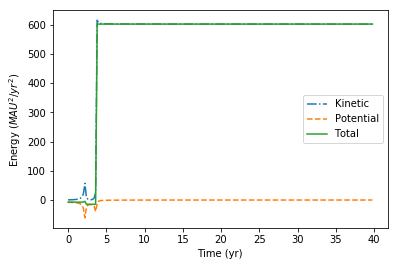

In [14]:
#* Graph the energy of the comet versus time.
totalE = kinetic + potential   # Total energy
plt.plot(tplot,kinetic,'-.',tplot,potential,'--',tplot,totalE,'-')
plt.legend(['Kinetic','Potential','Total']);
plt.xlabel('Time (yr)')
plt.ylabel(r'Energy ($M AU^2/yr^2$)')
plt.show()